## Importing Data

In [7]:
import xarray as xr
import matplotlib.pyplot as plt
from matplotlib.colors import TwoSlopeNorm
import numpy as np

import cartopy.crs as ccrs
import cartopy.mpl.ticker as cticker
from cartopy.util import add_cyclic_point
import cartopy.feature as feature

In [3]:
path = '/home/nblancoa/clim_680_dataset//'
fname = 'precip.mon.mean.2.5x2.5.nc'
ds = xr.open_dataset(path+fname)
ds

<xarray.Dataset>
Dimensions:  (lat: 72, lon: 144, time: 908)
Coordinates:
  * lat      (lat) float32 88.75 86.25 83.75 81.25 ... -83.75 -86.25 -88.75
  * lon      (lon) float32 1.25 3.75 6.25 8.75 11.25 ... 351.2 353.8 356.2 358.8
  * time     (time) datetime64[ns] 1948-01-01 1948-02-01 ... 2023-08-01
Data variables:
    precip   (time, lat, lon) float32 ...
Attributes:
    title:          Precipitation Reconstruction over Land (PREC/L): 2.5x2.5
    platform:       Analyses
    institution:    NOAA ESRL/PSD
    citation:       Chen, M., P. Xie, J. E. Janowiak, and P. A. Arkin, 2002: ...
    history:        created 01/2011 by CAS\nConverted to chunked, deflated Ne...
    Conventions:    CF-1.2
    dataset_title:  Precipitation Reconstruction over Land (PREC/L)
    References:     http://www.psl.noaa.gov/data/gridded/data.precl.html
    data_modified:  2023-08-03

In [4]:
ds_mon=ds.groupby('time.month').mean()
ds_mon

<xarray.Dataset>
Dimensions:  (lat: 72, lon: 144, month: 12)
Coordinates:
  * lat      (lat) float32 88.75 86.25 83.75 81.25 ... -83.75 -86.25 -88.75
  * lon      (lon) float32 1.25 3.75 6.25 8.75 11.25 ... 351.2 353.8 356.2 358.8
  * month    (month) int64 1 2 3 4 5 6 7 8 9 10 11 12
Data variables:
    precip   (month, lat, lon) float32 nan nan nan nan ... 0.243 0.239 0.235

## 12-Panel Plot of Climatology

/tmp/ipykernel_889037/2417338066.py:40: UserWarning: This figure was using constrained_layout, but that is incompatible with subplots_adjust and/or tight_layout; disabling constrained_layout.
  fig.subplots_adjust(bottom=0.25, top=0.9, left=0.05, right=0.95,


''

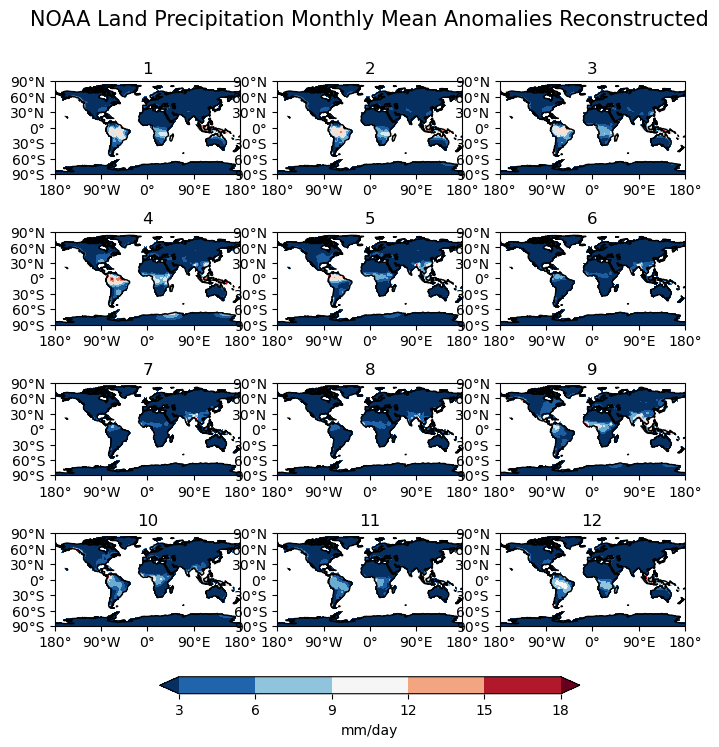

In [5]:
# Define the figure and each axis for the 2 rows and 2 columns
fig, axs = plt.subplots(nrows=4,ncols=3,
                        subplot_kw={'projection': ccrs.PlateCarree()},
                        figsize=(7,8.5),  layout='constrained')

axs=axs.flatten()


#Loop over all of the seasons and plot
for i,mon in enumerate(ds_mon['month']):

        # Select the season
        data=ds_mon['precip'].sel(month=mon)

        # Add the cyclic point
        data,lons=add_cyclic_point(data,coord=ds_mon['lon'])

        # Contour plot
        cs=axs[i].contourf(lons,ds_mon['lat'],data,
                          transform = ccrs.PlateCarree(),
                          cmap='RdBu_r',extend='both')

       # Longitude labels
        axs[i].set_xticks(np.arange(-180,181,90), crs=ccrs.PlateCarree())
        lon_formatter = cticker.LongitudeFormatter()
        axs[i].xaxis.set_major_formatter(lon_formatter)

        # Latitude labels
        axs[i].set_yticks(np.arange(-90,91,30), crs=ccrs.PlateCarree())
        lat_formatter = cticker.LatitudeFormatter()
        axs[i].yaxis.set_major_formatter(lat_formatter)

          # Title each subplot with the name of the season
        axs[i].set_title(mon.values)

          # Draw the coastines for each subplot
        axs[i].coastlines()
        
# Adjust the location of the subplots 
fig.subplots_adjust(bottom=0.25, top=0.9, left=0.05, right=0.95,
                    wspace=0.2, hspace=0.5)

# Add a colorbar axis at the bottom of the graph
cbar_ax = fig.add_axes([0.2, 0.175, 0.6, 0.02])

# Draw the colorbar
cbar=fig.colorbar(cs, cax=cbar_ax,orientation='horizontal',label='mm/day')

# Add a big title at the top
plt.suptitle('NOAA Land Precipitation Monthly Mean Anomalies Reconstructed',fontsize=15)


;

## Fixes

/tmp/ipykernel_889037/2385571362.py:36: UserWarning: This figure was using constrained_layout, but that is incompatible with subplots_adjust and/or tight_layout; disabling constrained_layout.
  fig.subplots_adjust(bottom=0.25, top=0.9, left=0.05, right=0.95,


''

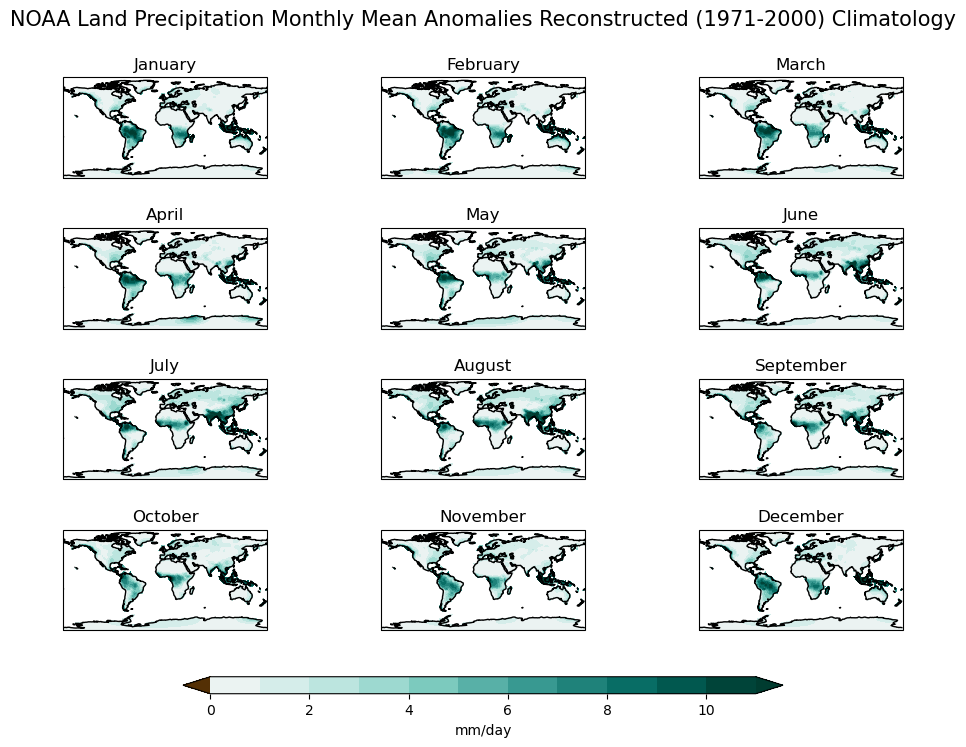

In [16]:
# Define the figure and each axis for the 2 rows and 2 columns
fig, axs = plt.subplots(nrows=4,ncols=3,
                        subplot_kw={'projection': ccrs.PlateCarree()},
                        figsize=(10,8.5),  layout='constrained')

axs=axs.flatten()
months_value_list = mon.values.tolist()
months = ['January','February','March','April','May','June','July','August','September','October','November','December']


clevs = np.arange(0,12,1)
z = np.linspace(-1,11,50*50).reshape(50,50)
divnorm = TwoSlopeNorm(vmin=z.min(), vcenter=0, vmax=z.max())

#Loop over all of the seasons and plot
for i,mon in enumerate(ds_mon['month']):

        # Select the season
        data=ds_mon['precip'].sel(month=mon)

        # Add the cyclic point
        data,lons=add_cyclic_point(data,coord=ds_mon['lon'])

        # Contour plot
        cs=axs[i].contourf(lons,ds_mon['lat'],data,clevs,
                          transform = ccrs.PlateCarree(),
                          cmap='BrBG',norm=divnorm, extend='both')
        
          # Title each subplot with the name of the season
        axs[i].set_title(months[i])

          # Draw the coastines for each subplot
        axs[i].coastlines()
        
# Adjust the location of the subplots 
fig.subplots_adjust(bottom=0.25, top=0.9, left=0.05, right=0.95,
                    wspace=0.2, hspace=0.5)

# Add a colorbar axis at the bottom of the graph
cbar_ax = fig.add_axes([0.2, 0.175, 0.6, 0.02])

# Draw the colorbar
cbar=fig.colorbar(cs, cax=cbar_ax,orientation='horizontal',label='mm/day')

# Add a big title at the top
plt.suptitle('NOAA Land Precipitation Monthly Mean Anomalies Reconstructed (1971-2000) Climatology',fontsize=15)


;